# **Project Name**    - Retail Sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

Rossmann operates over 3000 drug stores in 7 Europeon countries. Currently rossmann store manager are tasked with predicting their daily sales for upto six weeks in advance. Store sales are influenced by many factors including promotions, competiton, school and state holiday, seasonality and locality. With thousands of managers predicting sales based on their unique circumstances, the accuracy of result can be quite varied. I am provided with historical sales data for 1115 Rossmann stores. My task is to forcast sales columns for the test set. I am provided  with two datasets Rossmann_df and store_df first of all I will read the dataset and try to understand the datasets, then I will check some basic informations like missing values, what all the columns are, descriptions of the dataset. then I will perform data wrangling after that I will visualize some important charts and try to understand them. Then I will handle missing values and outliers. After that I will merge the dataset do feature engineering and also data encoding. Next splitting  the dataset for train and test purpose, after that I will do dimention reduction, data transformation and normalization/standardization. Then I will apply for machine learning algorithm, predicting the data and also evaluate the model. At last I will have to make some conclusion about the project.

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_3_regression

# **Problem Statement**


Sales prediction is extremely for any business as it forcast the sales for the clients who want to stock some product for  future. I have two dataset for this project 'Rossmann Stores Data.csv' and 'store.csv'. 'Rossmann Stores Data.csv' has 1017209 rows and 9 columns and 'store.csv' has 1115 rows and 10 columns. I have to do data analysis first for both the datasets and then merge the data after merging the data my task is to apply machine learning regression algorithm to predict the salling price.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Regression/'
# path = 'E:/Data Science/amlabetter/Capstone Projects/REGRESSION/'
f_names = np.array(['Rossmann Stores Data.csv','store.csv'])
rossmann_df = pd.read_csv(path+f_names[0])
store_df = pd.read_csv(path+f_names[1])
final_df = rossmann_df.merge(store_df,how='left', on='Store')

### Dataset First View

In [4]:
# Dataset First Look

# First view for rossmann_df
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# First view for store_df
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# First view for final_df
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

# Rows and column counts for  rossmann_df
print(f" Rows and columns count for rossmann_df : {rossmann_df.shape}")
print(f" Rows and columns count for store_df : {store_df.shape}")
print(f" Rows and columns count for final_df : {final_df.shape}")

 Rows and columns count for rossmann_df : (1017209, 9)
 Rows and columns count for store_df : (1115, 10)
 Rows and columns count for final_df : (1017209, 18)


### Dataset Information

In [8]:
# Dataset Info
# rossmann_df
print("Dataset info for rossmann_df : ")
rossmann_df.info()
#store_df
print("\nDataset info for store_df : ")
store_df.info()
# final_df
print("\nDataset info for final_df : ")
final_df.info()

Dataset info for rossmann_df : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

Dataset info for store_df : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
# rossmann_df
print(f"\n duplicate values for rossmann_df : {rossmann_df.duplicated().value_counts()}")
# rossmann_df
print(f"\n duplicate values for store_df : {store_df.duplicated().value_counts()}")
# rossmann_df
print(f"\n duplicate values for final_df : {final_df.duplicated().value_counts()}")


 duplicate values for rossmann_df : False    1017209
dtype: int64

 duplicate values for store_df : False    1115
dtype: int64

 duplicate values for final_df : False    1017209
dtype: int64


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
# function to calculate the number of null values
def null_calculator(df):
  result = {}
  for col in df.columns:
    result[col] = len(df[df[col].isna() == True])
  return result
# rossmann_df
print(f"\nmissing/null values for rossmann_df :\n {null_calculator(rossmann_df)}")
# store_df
print(f"\nmissing/null values for store_df :\n {null_calculator(store_df)}")
# rossmann_df
print(f"\nmissing/null values for final_df :\n {null_calculator(final_df)}")


missing/null values for rossmann_df :
 {'Store': 0, 'DayOfWeek': 0, 'Date': 0, 'Sales': 0, 'Customers': 0, 'Open': 0, 'Promo': 0, 'StateHoliday': 0, 'SchoolHoliday': 0}

missing/null values for store_df :
 {'Store': 0, 'StoreType': 0, 'Assortment': 0, 'CompetitionDistance': 3, 'CompetitionOpenSinceMonth': 354, 'CompetitionOpenSinceYear': 354, 'Promo2': 0, 'Promo2SinceWeek': 544, 'Promo2SinceYear': 544, 'PromoInterval': 544}

missing/null values for final_df :
 {'Store': 0, 'DayOfWeek': 0, 'Date': 0, 'Sales': 0, 'Customers': 0, 'Open': 0, 'Promo': 0, 'StateHoliday': 0, 'SchoolHoliday': 0, 'StoreType': 0, 'Assortment': 0, 'CompetitionDistance': 2642, 'CompetitionOpenSinceMonth': 323348, 'CompetitionOpenSinceYear': 323348, 'Promo2': 0, 'Promo2SinceWeek': 508031, 'Promo2SinceYear': 508031, 'PromoInterval': 508031}


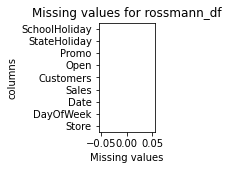

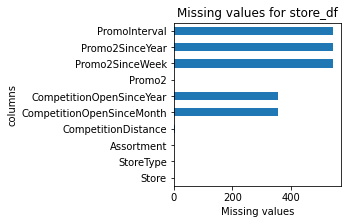

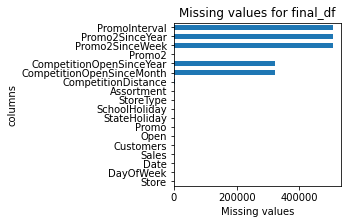

In [11]:
# Visualizing the missing values
# rossmann_df
plt.rcParams['figure.figsize'] = (1,2)
pd.Series(null_calculator(rossmann_df)).plot.barh()
plt.xlabel('Missing values')
plt.ylabel('columns')
plt.title('Missing values for rossmann_df')
plt.show()
# store_df
plt.rcParams['figure.figsize'] = (3,3)
pd.Series(null_calculator(store_df)).plot.barh()
plt.xlabel('Missing values')
plt.ylabel('columns')
plt.title('Missing values for store_df')
plt.show()
# final_df
plt.rcParams['figure.figsize'] = (3,3)
pd.Series(null_calculator(final_df)).plot.barh()
plt.xlabel('Missing values')
plt.ylabel('columns')
plt.title('Missing values for final_df')
plt.show()

### What did you know about your dataset?

I am provided with two datasets for this project 1. rossmann_df 2. store_df and got third dataset final_df after merging them.

rossmann_df : It has 1017209 observations and 9 features without and duplicate and null values. Column names for the dataset are :
    <ol><li> Store
        <li>DayOfWeek
        <li>Date
        <li>Sales
        <li>Customers
        <li>Open
        <li>Promo
        <li>StateHoliday
        <li>SchoolHoliday

store_df : It has 1115 observations and 10 features without duplicate values but there are some null values. Column names and null values for each column are given below :
    <ol><li> Store
        <li>StoreType
        <li>Assortment
        <li>CompetitionDistance : 3 null values
        <li>CompetitionOpenSinceMonth : 354 null values
        <li>CompetitionOpenSinceYear : 354 null values
        <li>Promo2
        <li>Promo2SinceWeek : 544 null values
        <li>Promo2SinceYear : 544 null values
        <li>PromoInterval : 544 null values

final_df : It has 1017209 rows and 18 columns and null values are below:

{'Store': 0,
 'DayOfWeek': 0,
 'Date': 0,
 'Sales': 0,
 'Customers': 0,
 'Open': 0,
 'Promo': 0,
 'StateHoliday': 0,
 'SchoolHoliday': 0,
 'StoreType': 0,
 'Assortment': 0,
 'CompetitionDistance': 2642,
 'CompetitionOpenSinceMonth': 323348,
 'CompetitionOpenSinceYear': 323348,
 'Promo2': 0,
 'Promo2SinceWeek': 508031,
 'Promo2SinceYear': 508031,
 'PromoInterval': 508031}

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print(f"\nColumns for  rossmann_df : {rossmann_df.columns}")
print(f"\nColumns for  store_df : {store_df.columns}")
print(f"\nColumns for  final_df : {final_df.columns}")


Columns for  rossmann_df : Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Columns for  store_df : Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

Columns for  final_df : Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [13]:
# Dataset Describe
# rossmann_df
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
# store_df
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [15]:
# final_df
final_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

<ol>
    <li>Store - Store ID
    <li>DayOfWeek - Day of the week like 1 for monday, 2 for tuesday etc...
    <li>Date - Date
    <li>Sales - Sales of the day
    <li>Customers - Number of customers
    <li>Open - Shop open or closed
    <li>Promo - Promoting or not
    <li>StateHoliday - what all states has holiday that day
    <li>SchoolHoliday - School holiday or not
    <li>Store - Store ID
    <li>StoreType - Type of store
    <li>Assortment - Type of Product
    <li>CompetitionDistance - Competition Distance
    <li>CompetitionOpenSinceMonth - competition open since month
    <li>CompetitionOpenSinceYear - competition open since year
    <li>Promo2 - Promo 2 or not
    <li>Promo2SinceWeek - Promo2 since week
    <li>Promo2SinceYear - promo2 since year
    <li>PromoInterval - Promo Interval

### Check Unique Values for each variable.

In [16]:
# rossmann_df
# Check Unique Values for each variable.
for col in rossmann_df.columns:
    print(f" Number of unique values in | {col} : {len(rossmann_df[col].unique())}")
    
# Unique values for store_df
for col in rossmann_df.columns:
    print(f" Unique values in {col} is/are : {rossmann_df[col].unique()}")

 Number of unique values in | Store : 1115
 Number of unique values in | DayOfWeek : 7
 Number of unique values in | Date : 942
 Number of unique values in | Sales : 21734
 Number of unique values in | Customers : 4086
 Number of unique values in | Open : 2
 Number of unique values in | Promo : 2
 Number of unique values in | StateHoliday : 5
 Number of unique values in | SchoolHoliday : 2
 Unique values in Store is/are : [   1    2    3 ... 1113 1114 1115]
 Unique values in DayOfWeek is/are : [5 4 3 2 1 7 6]
 Unique values in Date is/are : ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '201

In [17]:
# store_df
# Check Unique Values for each variable.
for col in store_df.columns:
    print(f" Number of unique values in Store is | {col} : {len(store_df[col].unique())}")
    
# Unique values for store_df
for col in store_df.columns:
    print(f" Unique values in {col} is/are : {store_df[col].unique()}")

 Number of unique values in Store is | Store : 1115
 Number of unique values in Store is | StoreType : 4
 Number of unique values in Store is | Assortment : 3
 Number of unique values in Store is | CompetitionDistance : 655
 Number of unique values in Store is | CompetitionOpenSinceMonth : 13
 Number of unique values in Store is | CompetitionOpenSinceYear : 24
 Number of unique values in Store is | Promo2 : 2
 Number of unique values in Store is | Promo2SinceWeek : 25
 Number of unique values in Store is | Promo2SinceYear : 8
 Number of unique values in Store is | PromoInterval : 4
 Unique values in Store is/are : [   1    2    3 ... 1113 1114 1115]
 Unique values in StoreType is/are : ['c' 'a' 'd' 'b']
 Unique values in Assortment is/are : ['a' 'c' 'b']
 Unique values in CompetitionDistance is/are : [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340

In [18]:
# final_df
# Check Unique Values for each variable.
for col in final_df.columns:
    print(f" Number of unique values in  | {col} : {len(final_df[col].unique())}")
    
# Unique values for store_df
for col in final_df.columns:
    print(f" Unique values in {col} is/are : {final_df[col].unique()}")

 Number of unique values in  | Store : 1115
 Number of unique values in  | DayOfWeek : 7
 Number of unique values in  | Date : 942
 Number of unique values in  | Sales : 21734
 Number of unique values in  | Customers : 4086
 Number of unique values in  | Open : 2
 Number of unique values in  | Promo : 2
 Number of unique values in  | StateHoliday : 5
 Number of unique values in  | SchoolHoliday : 2
 Number of unique values in  | StoreType : 4
 Number of unique values in  | Assortment : 3
 Number of unique values in  | CompetitionDistance : 655
 Number of unique values in  | CompetitionOpenSinceMonth : 13
 Number of unique values in  | CompetitionOpenSinceYear : 24
 Number of unique values in  | Promo2 : 2
 Number of unique values in  | Promo2SinceWeek : 25
 Number of unique values in  | Promo2SinceYear : 8
 Number of unique values in  | PromoInterval : 4
 Unique values in Store is/are : [   1    2    3 ... 1113 1114 1115]
 Unique values in DayOfWeek is/are : [5 4 3 2 1 7 6]
 Unique val

## 3. ***Data Wrangling***

### Data Wrangling Code

rossmann_df

In [19]:
# approximately 17% observations are zero
print(f"Percentage of data when shops were closed : {round(len(rossmann_df[rossmann_df['Open'] == 0])/len(rossmann_df),4)*100}.")

# Dropping the data when shops were closed and also dropping the  column 'Open'.
rossmann_df = rossmann_df[rossmann_df['Open'] == 1]
rossmann_df.drop(columns=['Open'], inplace=True)

# from str to date time conversion
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))

# creating day, month, year columns
plt.rcParams['figure.figsize'] = (5,3)
rossmann_df['day'] = rossmann_df['Date'].apply(lambda d: d.day)
rossmann_df['month'] = rossmann_df['Date'].apply(lambda m: m.month)
rossmann_df['year'] = rossmann_df['Date'].apply(lambda y: y.year)

Percentage of data when shops were closed : 16.99.


### What all manipulations have you done and insights you found?

#### rossmann_df :
First of all I dropped all the rows which contains only zeros in all columns and also dropped the column Open. After that I converted Date column from string to date time type. Further I created 3 more columns day, month, year from Date column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

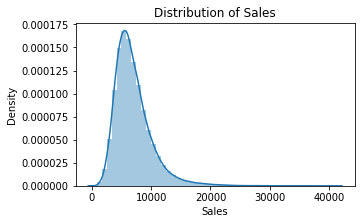

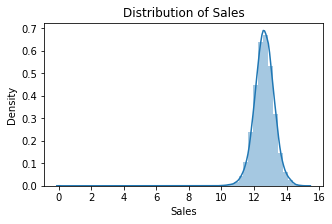

In [20]:
# Chart - 1 visualization code

# Distribution plot for Sales

# Before log transformation
sns.distplot(rossmann_df['Sales'])
plt.title('Distribution of Sales')
plt.show()
print('\n')

# After log transformation
sns.distplot(np.log2(rossmann_df['Sales']+1))
plt.title('Distribution of Sales')
plt.show()

##### 1. Why did you pick the specific chart?

I picked that chart to see how the Target column is distributed.

##### 2. What is/are the insight(s) found from the chart?

From that  chart I found that the Sales column was very close to normal distribution but after log transformation I found that the distribution became more closer to Normal distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since the column is normally distributed so it will be very helpfull when ML algorithm will be applied, it will give good accuracy. I do not think there is any negative impact.

#### Chart - 2

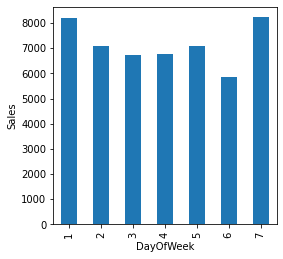

In [21]:
# Chart - 2 visualization code
# Average Sales from day 1 to day 7
plt.rcParams['figure.figsize'] = (4,4)
rossmann_df.groupby(['DayOfWeek'])['Sales'].mean().plot.bar()
plt.ylabel('Sales')
plt.show()

# hypothesis : Average Sales are minimum on day 7

##### 1. Why did you pick the specific chart?

I picked this chart to see what are the Sales for different days.

##### 2. What is/are the insight(s) found from the chart?

I found that average sales are maximum are day 1 and day 7.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. On day 1 and 7 I found that Sales are maximum I think it is because most of the people are free on sunday and therefore they purchace more.

#### Chart - 3

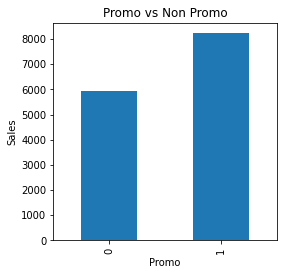

In [22]:
# Chart - 3 visualization code
# Sales comparison for promotional and non promotional
rossmann_df.groupby(['Promo'])['Sales'].mean().plot.bar()
plt.title('Promo vs Non Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

To see the effect of Promo on Sales.

##### 2. What is/are the insight(s) found from the chart?

I found that Sale is higher when running promo.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights help creating a positive business impact.<br> There is some negative insight when the shop is not running a promo so their sale is lower.

#### Chart - 4

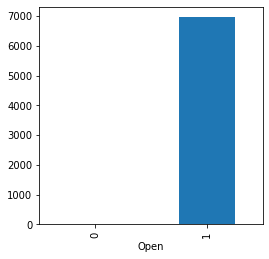

In [23]:
# Chart - 4 visualization code
final_df.groupby(['Open'])['Sales'].mean().plot.bar()
plt.show()
# hypothesis : mean price is 0 when shop is closed.

##### 1. Why did you pick the specific chart?

To check mean sales when shop is opened/closed

##### 2. What is/are the insight(s) found from the chart?

I found that the average price is zero when shop is closed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the  chart is very helpful to see the relationship between open and closed shop. Yes when the shop is closed then sale is zero that is not good for any business.

#### Chart - 5

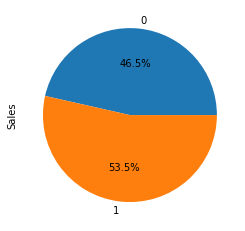

In [24]:
# Chart - 5 visualization code
final_df.groupby(['SchoolHoliday'])['Sales'].mean().plot.pie(autopct='%0.01f%%')
plt.show()

##### 1. Why did you pick the specific chart?

To check effect of Sales on holiday and non holiday for school.

##### 2. What is/are the insight(s) found from the chart?

Mean price is higher when there is school holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, when there is school holiday then sale is hihgher.

#### Chart - 6

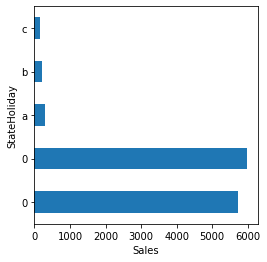

In [25]:
# Chart - 6 visualization code
final_df.groupby(['StateHoliday'])['Sales'].mean().plot.barh()
plt.xlabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

To check relationship between average sales and state holiday.

##### 2. What is/are the insight(s) found from the chart?

Average price for 0 and '0' is ten times higher than a,b,c type of state holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

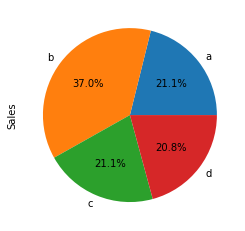

In [26]:
# Chart - 7 visualization code
final_df.groupby(['StoreType'])['Sales'].mean().plot.pie(autopct='%0.01f%%')
plt.show()

##### 1. Why did you pick the specific chart?

to check which type of shop is earnig most.

##### 2. What is/are the insight(s) found from the chart?

I found that average sales for type b is highest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes here I found that sales for type b shop is highest.

#### Chart - 8

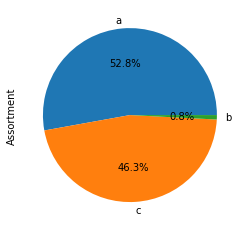

In [27]:
# Chart - 8 visualization code
final_df['Assortment'].value_counts().plot.pie(autopct='%0.01f%%')
plt.show()

##### 1. Why did you pick the specific chart?

To see quantity of assortment.

##### 2. What is/are the insight(s) found from the chart?

I found that count of type a assortment is highest which is more than 50,000 and type c is slightly lower than a but type c is least among them.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

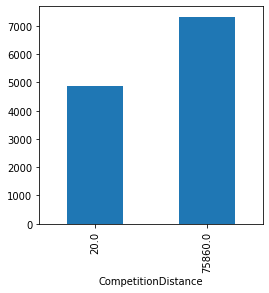

In [28]:
# Chart - 9 visualization code
final_df[ (final_df['CompetitionDistance'] == final_df['CompetitionDistance'].min())\
         | (final_df['CompetitionDistance'] == final_df['CompetitionDistance'].max())].\
groupby(['CompetitionDistance'])['Sales'].mean().plot.bar()
plt.show()

##### 1. Why did you pick the specific chart?

To see effect of competition distance on average sales.

##### 2. What is/are the insight(s) found from the chart?

I found that for min distance average sales is lower but for high competition average sale is also higher.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

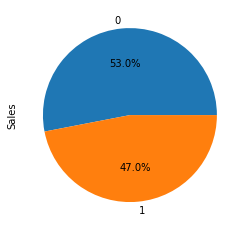

In [29]:
# Chart - 10 visualization code
final_df.groupby(['Promo2'])['Sales'].mean().plot.pie(autopct='%0.01f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Relationship between Promo2 and average price.

##### 2. What is/are the insight(s) found from the chart?

Average price is higher when there is no promo2.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

answer

#### Chart - 11

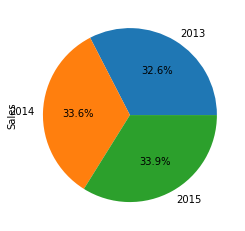

In [30]:
# Chart - 11 visualization code
rossmann_df.groupby(['year'])['Sales'].mean().plot.pie(autopct='%0.01f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

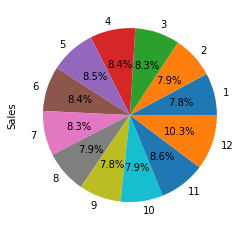

In [31]:
# Chart - 12 visualization code
rossmann_df.groupby(['month'])['Sales'].mean().plot.pie(autopct='%0.01f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

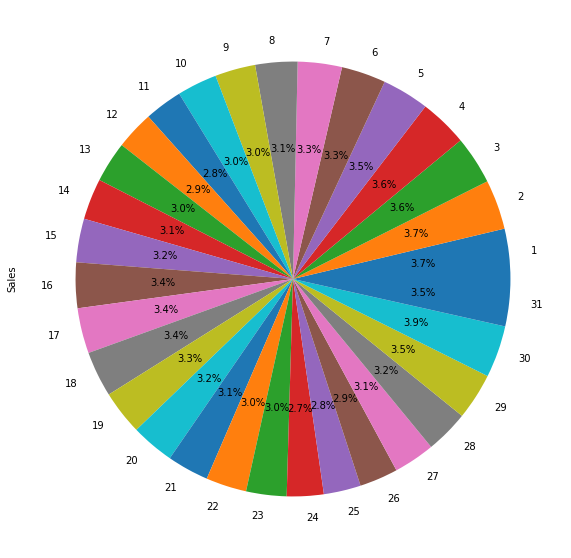

In [32]:
# Chart - 13 visualization code
rossmann_df.groupby(['day'])['Sales'].mean().plot.pie(autopct='%0.01f%%', figsize=(10,10))
plt.show()
del rossmann_df
del store_df

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

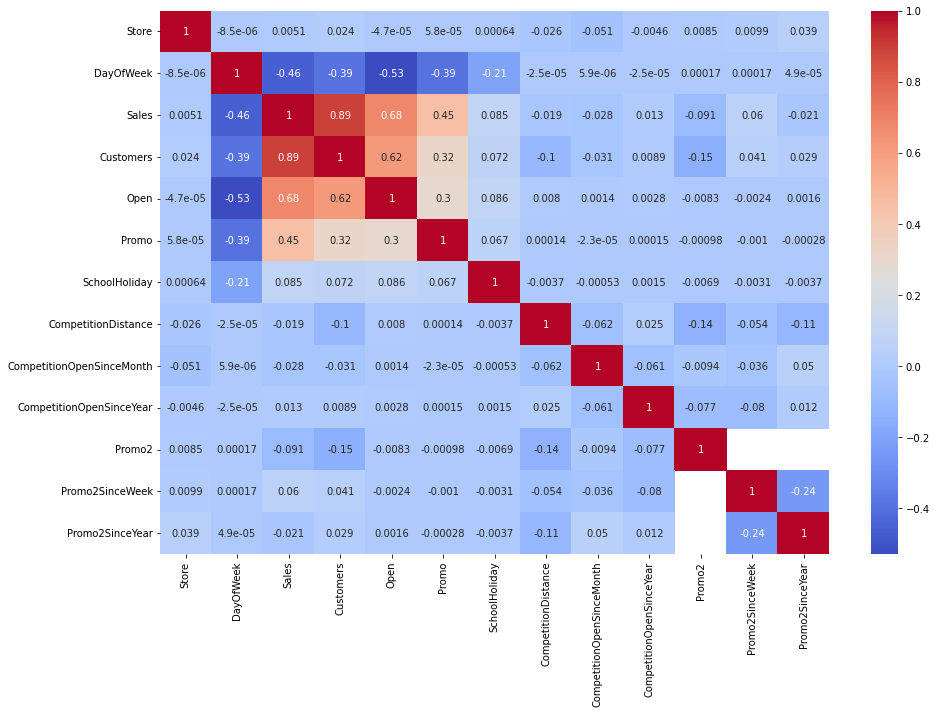

In [33]:
# Correlation Heatmap visualization code
plt.rcParams['figure.figsize'] = (15,10)
corr = final_df.corr()
sns.heatmap(corr,annot=True, cmap= 'coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

To check correlations

##### 2. What is/are the insight(s) found from the chart?

Customers are .89 correlated with Sales, .62 with Open, .32 with Promo. promo and sales are .45 correlated. Promo and open are .3 correlated. Open and Sales are .68 correlated. rest are very low correlated.

#### Chart - 15 - Pair Plot 

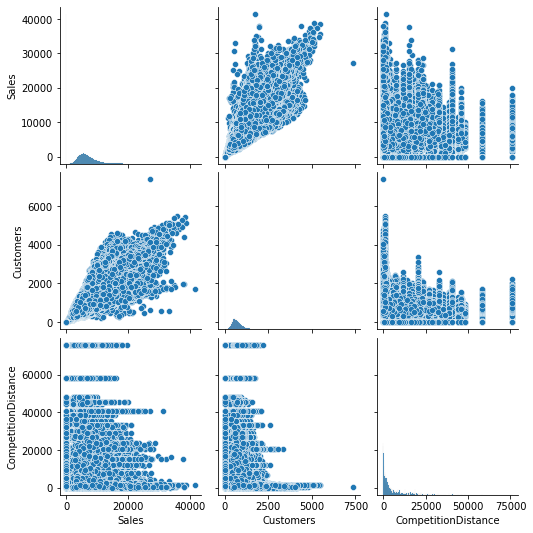

In [34]:
# Pair Plot visualization code
plt.rcParams['figure.figsize'] = (5,4)
sns.pairplot(final_df[['Sales','Customers','CompetitionDistance']])
plt.show()

##### 1. Why did you pick the specific chart?

To see the relationship of one column with another.

##### 2. What is/are the insight(s) found from the chart?

I found they have linear pattern.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation
for i in null_calculator(final_df).keys():
    print(f"{i} : {null_calculator(final_df)[i]/len(final_df)*100}")
    
# dropping the columns which has more than 30% null values because already lost lot of informations and also dropping the rows
# which has only less than 1% null values 
col_to_drop = ['Open', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear',\
               'Promo2SinceWeek','Promo2SinceYear','PromoInterval']
final_df.drop(columns=col_to_drop,inplace=True)
final_df = final_df.dropna()

Store : 0.0
DayOfWeek : 0.0
Date : 0.0
Sales : 0.0
Customers : 0.0
Open : 0.0
Promo : 0.0
StateHoliday : 0.0
SchoolHoliday : 0.0
StoreType : 0.0
Assortment : 0.0
CompetitionDistance : 0.25973030124586
CompetitionOpenSinceMonth : 31.787764363075826
CompetitionOpenSinceYear : 31.787764363075826
Promo2 : 0.0
Promo2SinceWeek : 49.94362023930186
Promo2SinceYear : 49.94362023930186
PromoInterval : 49.94362023930186


#### What all missing value imputation techniques have you used and why did you use those techniques?

Deleted these columns ['Open', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear',\
               'Promo2SinceWeek','Promo2SinceYear','PromoInterval'] they were containing more than 30% null values and 'Open' columns is not required. Also deleted some null rows which is less than 1% null values.

### 2. Handling Outliers

In [39]:
# Handling Outliers & Outlier treatments
final_df = final_df[final_df['Sales']!=0]

# Single variate outlier detection
q1 = final_df['Sales'].quantile(.25)
q3 = final_df['Sales'].quantile(.75)
iqr = q3-q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
final_df = final_df[(final_df['Sales'] <= upper) & (final_df['Sales'] >= lower)]
final_df.shape

(811408, 12)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I deleted those observation when sale is 0 because when customer is 0 then sale is also 0 or shop is closed therefore these are some kind of outliers. Then I focused on the target column and deleted some outliers using  1.5*IQR method.

### 3. Categorical Encoding

In [40]:
# Encode your categorical columns
# Econding StateHoliday
# mean: c>a>'0'>b>0
print(f"Different catagories for StateHoliday : {final_df.groupby(['StateHoliday'])['Sales'].mean()}")
# function for encoding the column 'StateHoliday'
# def State_holiday_encoder(col):
#     if col == 'c':
#         return 5
#     elif col == 'b':
#         return 2
#     elif col == 'a':
#         return 4
#     elif col == '0':
#         return 3
#     elif col == 0:
#         return 1
#     else:
#         print('invalid')
        
# b>c>a
# function to encode assortment
# def assortment_encoder(col):
#     if col == 'a':
#         return 1
#     elif col == 'b':
#         return 3
#     else:
#         return 2
    
# b>d>c>a
# function to encode store type
# def store_type_encoder(col):
#     if col == 'a':
#         return 1
#     elif col == 'b':
#         return 4
#     elif col == 'c':
#         return 2
#     else:
#         return 3
    
# applying above function
# final_df['Assortment'] = final_df['Assortment'].apply(assortment_encoder)
# final_df['StateHoliday'] = final_df['StateHoliday'].apply(State_holiday_encoder)
# final_df['StoreType'] = final_df['StoreType'].apply(store_type_encoder)




# one hot encoding for Assortment and StoreType columns
final_df['AssortmentA'] = final_df['Assortment'].apply(lambda data: 1 if data == 'a' else 0)
final_df['AssortmentB'] = final_df['Assortment'].apply(lambda data: 1 if data == 'b' else 0)
final_df['AssortmentC'] = final_df['Assortment'].apply(lambda data: 1 if data == 'c' else 0)

final_df['StoreTypeA'] = final_df['StoreType'].apply(lambda data: 1 if data == 'a' else 0)
final_df['StoreTypeB'] = final_df['StoreType'].apply(lambda data: 1 if data == 'b' else 0)
final_df['StoreTypeC'] = final_df['StoreType'].apply(lambda data: 1 if data == 'c' else 0)
final_df['StoreTypeD'] = final_df['StoreType'].apply(lambda data: 1 if data == 'd' else 0)


final_df['sh_a'] = final_df['StateHoliday'].apply(lambda data: 1 if data == 'a' else 0)
final_df['sh_b'] = final_df['StateHoliday'].apply(lambda data: 1 if data == 'b' else 0)
final_df['sh_c'] = final_df['StateHoliday'].apply(lambda data: 1 if data == 'c' else 0)
final_df['sh_d'] = final_df['StateHoliday'].apply(lambda data: 1 if data == 0 else 0)
final_df['sh_e'] = final_df['StateHoliday'].apply(lambda data: 1 if data == '0' else 0)


final_df.drop(columns =['Assortment', 'StoreType','StateHoliday'], inplace= True)

Different catagories for StateHoliday : StateHoliday
0    6411.805871
0    6615.432532
a    6666.006803
b    6466.185185
c    7597.017241
Name: Sales, dtype: float64


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I did one hot encoding to StateHoliday, StoreType and Assortment columns because the mean price of each catagory was different.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [41]:
# Manipulate Features to minimize feature correlation and create new features

# from str to date time conversion
final_df['Date'] = final_df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))
# creating day, month, year columns
plt.rcParams['figure.figsize'] = (5,3)
final_df['day'] = final_df['Date'].apply(lambda d: d.day)
final_df['month'] = final_df['Date'].apply(lambda m: m.month)
final_df['year'] = final_df['Date'].apply(lambda y: y.year)

# Dropping Date column
final_df.drop(columns=['Date'], inplace=True)

In [42]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Multicolinearitiy check
high_vif_col = ['Sales','year','AssortmentA','sh_d','StoreTypeA','sh_e']
calc_vif(final_df[[i for i in final_df.describe().columns if i not in high_vif_col ]])

,variables,VIF
0,Store,3.643572
1,DayOfWeek,4.414041
2,Customers,6.502388
3,Promo,1.949802
4,SchoolHoliday,1.273658
5,CompetitionDistance,1.565183
6,Promo2,1.994935
7,AssortmentB,2.527099
8,AssortmentC,2.030765
9,StoreTypeB,2.638817


#### 2. Feature Selection

In [43]:
# Select your features wisely to avoid overfitting
selected_features = ['DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','Promo2',\
                     'AssortmentB','AssortmentC','StoreTypeB','StoreTypeC','StoreTypeD','sh_a','sh_b','sh_c','day','month','Sales']
final_df = final_df[selected_features]

##### What all feature selection methods have you used  and why?

 These are the features ['DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','Promo2',\
                     'AssortmentB','AssortmentC','StoreTypeB','StoreTypeC','StoreTypeD','sh_a','sh_b','sh_c','day','month'] I have selected because they have low VIF score.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [44]:
# Transform Your data
X = np.log10(final_df[['Customers','CompetitionDistance']])
final_df['Customers'] = X['Customers']
final_df['CompetitionDistance'] = X['CompetitionDistance']
del X

My data was in different range . To make them in same range data transformation is needed. Here I am using log transformation.

### 6. Data Scaling

In [45]:
# Scaling your data
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(final_df[['Customers','CompetitionDistance']])
final_df['Customers'] = X[:,0]
final_df['CompetitionDistance'] = X[:,1]
del X

##### Which method have you used to scale you data and why?

Here I used standard scaler because my data was already very close to normal distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

I do not think in my case dimentionality reduction is needed because I already have limited features.

In [46]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
X = pca.fit_transform(final_df.drop(columns=['Sales']))
pca.explained_variance_ratio_

array([8.13674433e-01, 1.19113431e-01, 3.25202331e-02, 1.39641971e-02,
       8.31147031e-03, 2.94078596e-03, 2.49142321e-03, 2.16982191e-03,
       1.89102316e-03, 1.62724349e-03, 1.05528202e-03, 2.03896967e-04,
       2.67119104e-05, 7.83159003e-06, 1.44133217e-06, 7.73473280e-07])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA for reducing my dimentions.

### 8. Data Splitting

In [47]:
# Split your data to train and test. Choose Splitting ratio wisely.
# xtrain,xtest,ytrain,ytest = train_test_split(final_df.drop(columns=['Sales']), final_df['Sales'], test_size=.25)
xtrain,xtest,ytrain,ytest = train_test_split(X, final_df['Sales'], test_size=.25)

##### What data splitting ratio have you used and why? 

I choose 25% for test and rest 75% to train my model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [48]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [49]:
# ML Model - 1 Implementation
model = LinearRegression()
# Fit the Algorithm
model.fit(xtrain,ytrain)
# Predict on the model
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

R2_score train : 0.7875049104606024
R2_score test : 0.7870211081687843


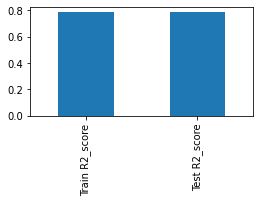

Root mean squared error train : 1116.1598234545174
Root mean squared error test : 1115.4594938024516


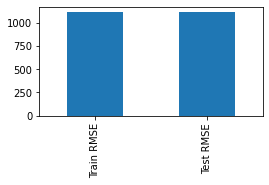

In [50]:
# Visualizing evaluation Metric Score chart
plt.rcParams['figure.figsize'] = (4,2)
# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)],\
          index=['Train R2_score', 'Test R2_score']).plot.bar()
plt.show()

# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))],\
          index=['Train RMSE', 'Test RMSE']).plot.bar()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_param = {'fit_intercept': [True,False],'positive': [True,False]}
grid_model = GridSearchCV(model,cv=10, param_grid = grid_param,verbose=2)
#### Fit the Algorithm
# cross validation fitting
grid_model.fit(xtrain,ytrain)
model = grid_model.best_estimator_
# Predict on the model
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.4s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.4s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.4s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.5s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.4s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.5s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.5s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.5s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.5s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.5s
[CV] END .................fit_intercept=True, positive=False; total time=   0.4s
[CV] END .................fit_intercept=True, po

R2_score train : 0.7875049104606024
R2_score test : 0.7870211081687843


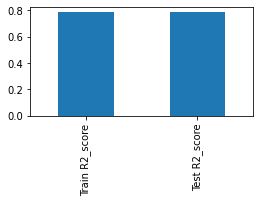

Root mean squared error train : 1116.1598234545174
Root mean squared error test : 1115.4594938024516


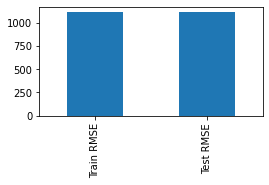

In [52]:
# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)],\
          index=['Train R2_score', 'Test R2_score']).plot.bar()
plt.show()

# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))],\
          index=['Train RMSE', 'Test RMSE']).plot.bar()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

R2_score train : 0.999992499213828
R2_score test : 0.7944220793307644


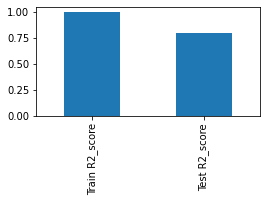

Root mean squared error train : 6.631401590508705
Root mean squared error test : 1095.9071419250445


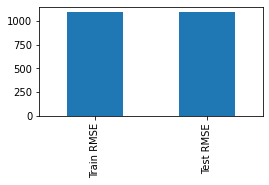

In [53]:
# Visualizing evaluation Metric Score chart

# Fitting decission tree regressor
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

# Predicting
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)],\
          index=['Train R2_score', 'Test R2_score']).plot.bar()
plt.show()

# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))],\
          index=['Train RMSE', 'Test RMSE']).plot.bar()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...max_depth=12, min_samples_leaf=5, random_state=1; total time=  11.5s
[CV] END ...max_depth=12, min_samples_leaf=5, random_state=1; total time=  11.7s
[CV] END ...max_depth=12, min_samples_leaf=5, random_state=1; total time=  13.0s
R2_score train : 0.8378661415319151
R2_score test : 0.8242895200180141


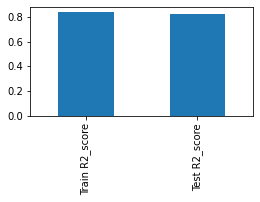

Root mean squared error train : 974.9644844089748
Root mean squared error test : 1013.1747437234541


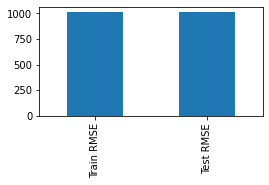

In [54]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_params = {'max_depth' : [12],'random_state':[1], 'min_samples_leaf': [5]}
grid_model = GridSearchCV(estimator=model,cv= 3, param_grid=grid_params, verbose=2)

# Fit the Algorithm
grid_model.fit(xtrain,ytrain)
model = grid_model.best_estimator_
# Predict on the model
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)],\
          index=['Train R2_score', 'Test R2_score']).plot.bar()
plt.show()

# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))],\
          index=['Train RMSE', 'Test RMSE']).plot.bar()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [55]:
# ML Model - 3 Implementation
model = XGBRegressor()
# Fit the Algorithm
model.fit(xtrain,ytrain)
# Predict on the model
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

[07:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

R2_score train : 0.8385803083019687
R2_score test : 0.8370890944638099


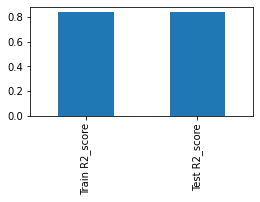

Root mean squared error train : 972.8148541969065
Root mean squared error test : 975.574862822588


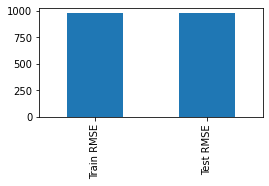

In [56]:
# Visualizing evaluation Metric Score chart

# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)],\
          index=['Train R2_score', 'Test R2_score']).plot.bar()
plt.show()

# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))],\
          index=['Train RMSE', 'Test RMSE']).plot.bar()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

grid_params = {'learning_rate':[.8],'random_state' :[0],'n_estimators': [100]}
grid_model = GridSearchCV(estimator=model,cv= 3, param_grid=grid_params, verbose=2)

# Fit the Algorithm
grid_model.fit(xtrain,ytrain)
model = grid_model.best_estimator_

# Predict on the model
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[07:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.8, n_estimators=100, random_state=0; total time= 1.1min
[07:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.8, n_estimators=100, random_state=0; total time= 1.1min
[07:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END learning_rate=0.8, n_estimators=100, random_state=0; total time= 1.1min
[07:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


R2_score train : 0.8506640972551949
R2_score test : 0.8475629449313875


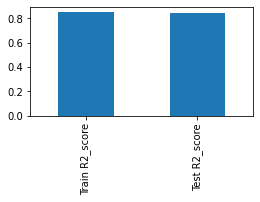

Root mean squared error train : 935.6944476683567
Root mean squared error test : 943.6931392600452


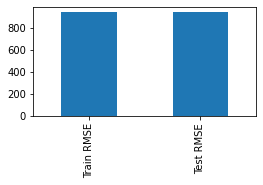

In [58]:
# Visualizing evaluation Metric Score chart

# R2 score for train and test
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)],\
          index=['Train R2_score', 'Test R2_score']).plot.bar()
plt.show()

# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))],\
          index=['Train RMSE', 'Test RMSE']).plot.bar()
plt.show()

In [59]:
grid_model.best_params_

{'learning_rate': 0.8, 'n_estimators': 100, 'random_state': 0}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [60]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [61]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***